<div style="background-color: #a7d9b6; color: black; padding: 20px">
  <h1 style="text-align: center"><strong>TPE Yann Inas 2023</strong></h1>
  <h2 style="text-align: center"><em>Détection de fraude bancaire</em></h2>
</div>

<!-- Pour le mode sombre -->

<style>
@media (prefers-color-scheme: dark) {
  div {
    background-color: #303030;
    color: white;
  }
}
</style>


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
DATA_x = pd.read_csv('./../data/X_train_G3tdtEn.csv', delimiter = ',',encoding = 'latin1', low_memory=False)
DATA_y = pd.read_csv('./../data/Y_train_2_XPXJDyy.csv', delimiter = ',',encoding = 'latin1', low_memory=False)

# 1. A quoi ressemble notre dataset ?

In [4]:
print("Shape de DATA_x", DATA_x.shape)
print("Shape de DATA_y", DATA_y.shape)

Shape de DATA_x (92790, 146)
Shape de DATA_y (92790, 3)


In [5]:
# Liste des noms de colonne présents dans DATA_x et DATA_y
column_names_x = DATA_x.columns.tolist()
column_names_y = DATA_y.columns.tolist()

# Affichage des noms de colonne
print(column_names_x)
print(column_names_y)

['ID', 'item1', 'item2', 'item3', 'item4', 'item5', 'item6', 'item7', 'item8', 'item9', 'item10', 'item11', 'item12', 'item13', 'item14', 'item15', 'item16', 'item17', 'item18', 'item19', 'item20', 'item21', 'item22', 'item23', 'item24', 'cash_price1', 'cash_price2', 'cash_price3', 'cash_price4', 'cash_price5', 'cash_price6', 'cash_price7', 'cash_price8', 'cash_price9', 'cash_price10', 'cash_price11', 'cash_price12', 'cash_price13', 'cash_price14', 'cash_price15', 'cash_price16', 'cash_price17', 'cash_price18', 'cash_price19', 'cash_price20', 'cash_price21', 'cash_price22', 'cash_price23', 'cash_price24', 'make1', 'make2', 'make3', 'make4', 'make5', 'make6', 'make7', 'make8', 'make9', 'make10', 'make11', 'make12', 'make13', 'make14', 'make15', 'make16', 'make17', 'make18', 'make19', 'make20', 'make21', 'make22', 'make23', 'make24', 'model1', 'model2', 'model3', 'model4', 'model5', 'model6', 'model7', 'model8', 'model9', 'model10', 'model11', 'model12', 'model13', 'model14', 'model15', 

In [6]:
DATA_x[['ID','item1','cash_price1','make1','model1','goods_code1','Nbr_of_prod_purchas1']].head(n=3)

,ID,item1,cash_price1,make1,model1,goods_code1,Nbr_of_prod_purchas1
0,85517,COMPUTERS,889.0,APPLE,2020 APPLE MACBOOK AIR 13 3 RETINA DISPLAY M1 ...,239246776,1.0
1,51113,COMPUTER PERIPHERALS ACCESSORIES,409.0,APPLE,APPLE WATCH SERIES 6 GPS 44MM SPACE GREY ALUMI...,239001518,1.0
2,83008,TELEVISIONS HOME CINEMA,1399.0,SAMSUNG,SAMSUNG QE75Q70A 2021 QLED HDR 4K ULTRA HD SMA...,239842093,1.0


In [7]:
DATA_y.head(n=2)

,index,ID,fraud_flag
0,0,85517,0
1,1,51113,0


In [8]:
merged_data = pd.merge(DATA_x, DATA_y, on='ID')

# Filtrage des lignes où 'fraud_flag' vaut 1
filtered_data = merged_data[merged_data['fraud_flag'] == 1]

print("Nombre de fraudes dans le dataset : ",filtered_data.shape[0])

filtered_data[['ID','item1','cash_price1','make1','model1','goods_code1','Nbr_of_prod_purchas1','fraud_flag','Nb_of_items']].head(n=3)


Nombre de fraudes dans le dataset :  1319


,ID,item1,cash_price1,make1,model1,goods_code1,Nbr_of_prod_purchas1,fraud_flag,Nb_of_items
110,5617,COMPUTER PERIPHERALS & ACCESSORIES,749.0,APPLE,APPLE WATCH SERIES 6,239001450,1.0,1,2.0
134,50414,COMPUTERS,1449.0,APPLE,2021 APPLE IPAD PRO 12 9 M1 PROCESSOR IOS WI-F...,240040997,1.0,1,2.0
165,101075,COMPUTERS,999.0,APPLE,2021 APPLE IPAD PRO 11 M1 PROCESSOR IOS WI-FI ...,240041014,1.0,1,1.0


Un panier (= une ligne, un ID) peut être constitué de 1 à 24 produits, et pour chaque produit on a 
- *item* : la catégorie du produit 
- *make* : la marque du produit
- *cash_price* : le cout du produit
- *model* : la référence exacte du produit
- *goods_code* : le code barre associé au produit
- *Nbr_of_prod_purchas* : le nombre de produits identiques commandés 
- *Nb_of_items* : le nombre de produits différents dans le panier (de 1 à 24)
- *fraud_flag* : Est-ce que le panier a été jugé frauduleux à postériori

# 2. Alléger notre dataset

### 2.1) Statistiquement, quelles colonnes peuvent être intéressantes ? 

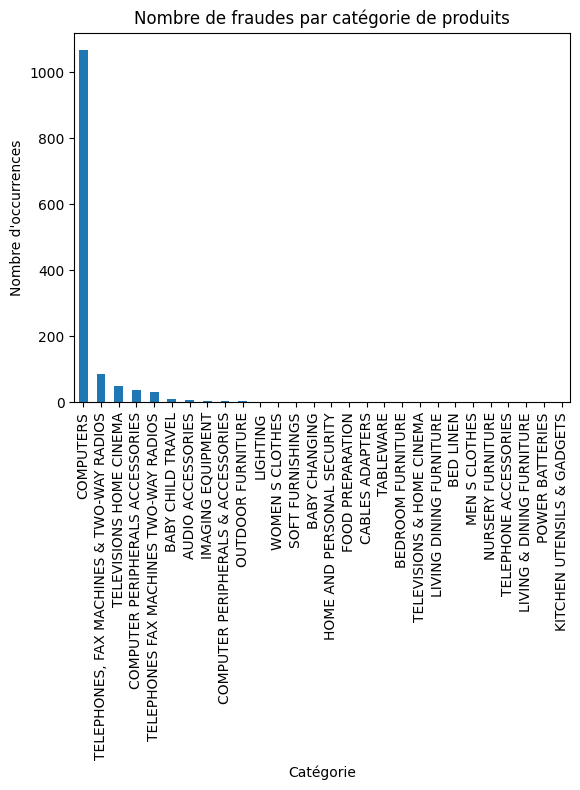

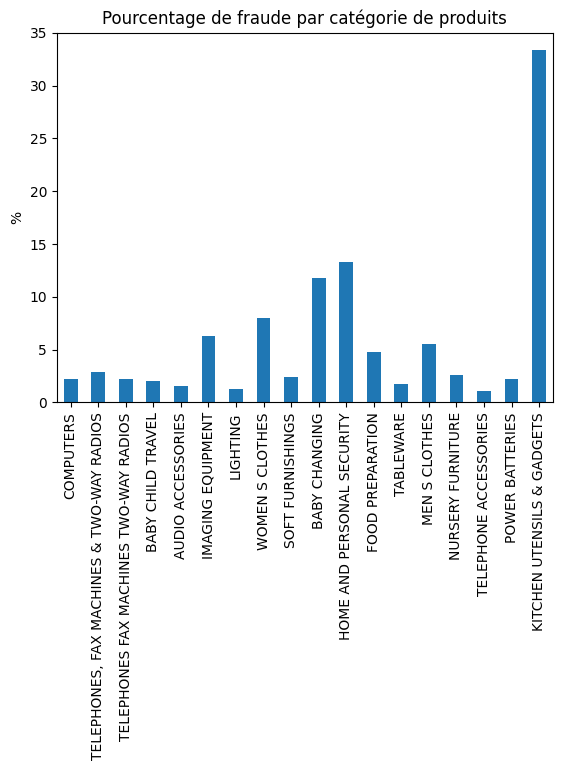

In [9]:
# Compte les catégories les plus concernés par la fraude (sur le premier item seulement)
fraude_par_categ = filtered_data['item1'].value_counts()

# Compte les catégories qui représentent le plus d'achats (sur le premier item seulement)
achat_par_categ = merged_data['item1'].value_counts() 

# Fusion des deux séries en un dataframe
df = pd.concat([fraude_par_categ, achat_par_categ], axis=1)
df.columns = ['fraude', 'achat']

# Calcul du pourcentage de fraude sur chaque catégorie
df['pourcentage_fraude'] = (df['fraude'] / df['achat']) * 100

df.sort_values(by='pourcentage_fraude', ascending=False).head(n=12)

# Dessin de l'histogramme
plt.figure()
fraude_par_categ.plot(kind='bar')
plt.title('Nombre de fraudes par catégorie de produits')
plt.xlabel('Catégorie')
plt.ylabel('Nombre d\'occurrences')
plt.figure()
plt.title('Pourcentage de fraude par catégorie de produits')
df[df['pourcentage_fraude'] > 1]['pourcentage_fraude'].plot(kind='bar')
plt.ylabel('%')
plt.show()

In [10]:
# Compte le nombre d'items des paniers frauduleux
fraude_par_nb_items = filtered_data['Nb_of_items'].value_counts()

# Compte le nombre d'items des paniers en général
achat_par_nb_items = merged_data['Nb_of_items'].value_counts()

# Fusion des deux séries en un dataframe
df = pd.concat([fraude_par_nb_items, achat_par_nb_items], axis=1)
df.columns = ['fraude', 'achat']

# Pourcentage de fraude en fonction du nombre d'items dans le panier
df['pourcentage_fraude'] = (df['fraude'] / df['achat']) * 100

df.sort_values(by='pourcentage_fraude', ascending=False).head(n=12)

,fraude,achat,pourcentage_fraude
24.0,1.0,5,20.000000
19.0,2.0,12,16.666667
14.0,2.0,26,7.692308
22.0,1.0,13,7.692308
20.0,1.0,14,7.142857
16.0,1.0,23,4.347826
2.0,594.0,31755,1.870572
11.0,1.0,62,1.612903
6.0,5.0,390,1.282051
1.0,611.0,48134,1.269373


Ce petit débroussaillage sur la fraude par marque, catégorie et sur le nombre d'items dans le panier est à prendre avec des pincettes : on s'est concentré uniquement sur le premier item du caddie, et si une marque représente 3achat dont une fraude, elle peut passer à 30% de taux de fraude. 

Pour une étude un peu plus poussé, voir les notebooks *categories.ipynb* et *categories.ipynb*

### 2.2) Création de dataframes avec One-hot encoding

In [11]:
marques = []
for i in range(1, 25):
    marques.append(DATA_x['make'+str(i)].astype(str).unique())

tableau_des_marques = np.unique(np.concatenate(marques))
print("Nombre de marques différentes : ",tableau_des_marques.size)

Nombre de marques différentes :  830


Les modèles de machine-learning ne peuvent pas gérer des catégories textuelles, et faire des calculs avec "APPLE", "SAMSUNG", etc. 
Une manière de faire est le **One-hot encoding**, qui consiste à créer une colonne par marque, et ajouter +1 si un panier (=une ligne) contient un produit de cette marque.

On pourrait le faire automatiquement avec la fonction `pandas.get_dummies`, mais la fonction va créer des colonnes de type make1_APPLE, make2_APPLE, make3_APPLE ... Il serait plus intéressant d'avoir une seule colonne APPLE par exemple. 

In [12]:
# Dataframe qui contient toutes les marques de DATA_x en colonnes. 
df_make = pd.DataFrame(columns=tableau_des_marques,index=DATA_x.index)

# Pour un panier donné dans DATA_x, on ajoute ``+Nbr_of_prod_purch`` dans la colonne de la marque correspondante dans df_make
for row in DATA_x.index:
    for i in range(1,25):
        if type(DATA_x[f"make{i}"][row]) == float: # Stop si valeur nulle
            break
        df_make[f"{DATA_x[f'make{i}'][row]}"][row] = DATA_x[f"Nbr_of_prod_purchas{i}"][row]


Faisons de même pour les catégories (COMPUTERS, WOMEN CLOTHES, ...)

In [13]:
items = []
for i in range(1, 25):
    items.append(DATA_x['item'+str(i)].astype(str).unique())

tableau_des_items = np.unique(np.concatenate(items))
print("Nombre d'items différentes : ",tableau_des_items.size)

Nombre d'items différentes :  174


In [14]:
df_item = pd.DataFrame(columns=tableau_des_items,index=DATA_x.index)

for row in DATA_x.index:
    for i in range(1,25):
        if type(DATA_x[f"item{i}"][row]) == float: # Stop si valeur nulle
            break
        df_item[f"{DATA_x[f'item{i}'][row]}"][row] = DATA_x[f"Nbr_of_prod_purchas{i}"][row]


*nb : les quatres cellules ont été codés dans le fichier ``pretraitement`` du dossier python du repo.*

Maintenant, j'ai deux dataframes : 
- un DF qui contient toutes les marques, avec le nombre d'objets de cette marque dans un panier donné (index)
- un DF qui contient toutes les catégories, avec le nombre d'objets de cette catégorie dans un panier donné (index)

On peut concaténer les deux et rajouter les colonnes manquantes mais intéressantes de DATA_x:
- Nb_of_items
- cash_price1-2-3...
- fraud flag si jamais

In [15]:
# Concaténation des deux DF 
df_make_item = pd.concat([df_make, df_item], axis=1)

# Rajout de la colonne "Nb_of_items" 
df_make_item['Nb_of_items'] = DATA_x['Nb_of_items']

# Rajoute les colonnes "cash_price1", "cash_price2", ..., "cash_price24"
cash_price_columns = ["cash_price" + str(i) for i in range(1, 25)]
X_cash_price = DATA_x[cash_price_columns]
df_make_item = pd.concat([df_make_item, X_cash_price], axis=1)

# Rajoute la colonne "fraud_flag"
df_make_item['fraud_flag'] = merged_data['fraud_flag'] 

# Dans le doute où le modèle ne sait pas gérer les NaN et les cases vides, on remplace par des 0.
df_make_item = df_make_item.fillna(0)

nb : je ne fais pas de sauvegarde du dataframe car on utilisera une version encore plus simplifié dans la suite. Mais toujours intéressant de voir l'évolution d'un cheminement de pensée ! 

# 3. **Machine Learning** : Its coding time ! 

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [17]:
# On va travailler avec le dataframe créé dans la section précédente.
X = df_make_item.drop(columns="fraud_flag",axis=1)
Y = df_make_item["fraud_flag"]

On a **1029** colonnes, dont ID | Marques .. | Catégories .. | cashprice1_2_3 | Nb_of_items | fraud_flag

### 3.1) Split train/test sur le dataset X 

In [18]:
# Séparation en ensembles d'entraînement et de test
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,Y, test_size=0.2, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, Y, test_size=0.3, random_state=42)

In [23]:
# Entraînement du modèle
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc1 = rfc.fit(X_train1, y_train1)
rfc2 = rfc.fit(X_train2, y_train2)

In [24]:
from sklearn.metrics import average_precision_score

accuracy1 = rfc1.score(X_test1, y_test1)
accuracy2 = rfc2.score(X_test1, y_test1)
y_pred1 = rfc1.predict(X_test1)
y_pred2 = rfc2.predict(X_test2)
print("average precision du premier split : ", average_precision_score(y_test1, y_pred1))
print("average precision du deuxièm split : ", average_precision_score(y_test2, y_pred2))
print("Accuracy du 1 :", accuracy1)
print("Accuracy du 2 :", accuracy1)

average precision du premier split :  0.067898732399523
average precision du deuxièm split :  0.06273656313466346
Accuracy du 1 : 0.9856126737795021
Accuracy du 2 : 0.9856126737795021


C'est déjà mieux qu'un modèle aléatoire .. On détecte en moyenne 6.2% des fraudes réels, contre 1.7% avec le modèle aléatoire. 

*nb : l'accuracy est une très mauvaise idée dans le cas d'un dataset aussi déséquilibré.*
*Pour rappel, $accuracy = \frac{\text{Nombre de bonnes prédictions}}{\text{Nombre total de prédictions}}$. On pourrait imaginer un modèle qui classe toutes les données dans la catégorie majoritaire, et avoir une précision de + de 90% ...*

# Bonus : je réutilise ce dataset pour comparer avec d'autres datasets simplifiés d'autres notebooks.

In [ ]:
import xgboost as xgb

boost = xgb.XGBClassifier()
boost.fit(X_train1, y_train1)
y_pred = boost.predict(X_test1)
print("average precision du premier split : ", average_precision_score(y_test1, y_pred))